In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('3_df_pak.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        1371 non-null   object 
 1   job_title              1371 non-null   object 
 2   job_location           1371 non-null   object 
 3   job_via                1371 non-null   object 
 4   job_schedule_type      1370 non-null   object 
 5   job_work_from_home     1371 non-null   bool   
 6   search_location        1371 non-null   object 
 7   job_posted_date        1371 non-null   object 
 8   job_no_degree_mention  1371 non-null   bool   
 9   job_health_insurance   1371 non-null   bool   
 10  job_country            1371 non-null   object 
 11  salary_rate            12 non-null     object 
 12  salary_year_avg        10 non-null     float64
 13  salary_hour_avg        1 non-null      float64
 14  company_name           1371 non-null   object 
 15  job_

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [5]:
from eda_functions import convert_job_skills
df['job_skills'] = df['job_skills'].apply(convert_job_skills)

unique_types = df['job_skills'].apply(type).unique()
unique_types

array([<class 'list'>, <class 'float'>], dtype=object)

In [6]:
df.job_location.unique()


array(['Karachi, Pakistan', 'Pakistan', 'Islamabad, Pakistan',
       'Lahore, Pakistan', 'Anywhere', 'Hyderabad, Pakistan',
       'Jatoi, Pakistan', 'Quetta, Pakistan',
       'Islamabad Capital Territory, Pakistan', 'Multan, Pakistan',
       'Faisalabad, Pakistan', 'Rawalpindi, Pakistan',
       'Pakistan (+2 others)', 'Pakistan (+1 other)', 'Khattan, Pakistan',
       'Khushāb, Pakistan', 'Kot Radha Kishan, Pakistan',
       'Mansehra, Pakistan', 'Qila Saifullah, Pakistan',
       'Loralai, Pakistan (+128 others)', 'Shahdara, Pakistan',
       'Peshawar, Pakistan', 'Kharian, Pakistan', 'Layyah, Pakistan',
       'Khyber Pakhtunkhwa, Pakistan', 'Sahiwal, Pakistan'], dtype=object)

In [7]:
# Function to extract city name
def extract_city(location):
    if ',' in location:
        return location.split(',')[0]
    elif ' (+' in location:
        return location.split(' (+')[0]
    elif 'Anywhere' in location:
        return 'Anywhere'
    else:
        return location

# Create new column 'city'
df['city'] = df['job_location'].apply(extract_city)

df.city.unique()

array(['Karachi', 'Pakistan', 'Islamabad', 'Lahore', 'Anywhere',
       'Hyderabad', 'Jatoi', 'Quetta', 'Islamabad Capital Territory',
       'Multan', 'Faisalabad', 'Rawalpindi', 'Khattan', 'Khushāb',
       'Kot Radha Kishan', 'Mansehra', 'Qila Saifullah', 'Loralai',
       'Shahdara', 'Peshawar', 'Kharian', 'Layyah', 'Khyber Pakhtunkhwa',
       'Sahiwal'], dtype=object)

In [8]:
df.query('city == "Anywhere"').job_work_from_home.unique()

array([ True])

It is confiremd that job posting having anywhere are work-from-home jobs

In [21]:
df[df["city"]=='Pakistan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,city


These postings do not specify city, and are not remote too . So we will make new category "unspecified"

In [74]:
df.loc[df['city'] == 'Pakistan', 'city'] = 'unspecified'
df.loc[df['city'] == 'Islamabad Capital Territory', 'city'] = 'Islamabad'


In [75]:
print(len(df[df["city"]=='Khyber Pakhtunkhwa']))
print("There is only one posting having province name in its city, we will leave it as it is")

1
There is only one posting having province name in its city, we will leave it as it is


In [76]:
df.dtypes

job_title_short                  object
job_title                        object
job_location                     object
job_via                          object
job_schedule_type                object
job_work_from_home                 bool
search_location                  object
job_posted_date          datetime64[ns]
job_no_degree_mention              bool
job_health_insurance               bool
job_country                      object
salary_rate                      object
salary_year_avg                 float64
salary_hour_avg                 float64
company_name                     object
job_skills                       object
job_type_skills                  object
city                             object
dtype: object

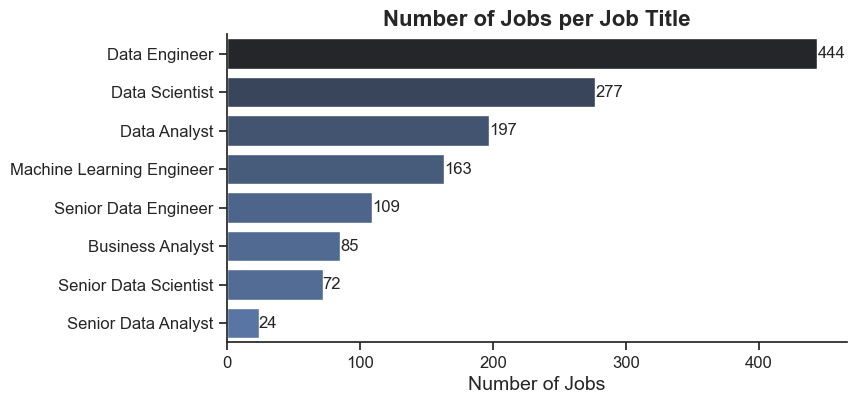

                           count
job_title_short                 
Data Engineer                444
Data Scientist               277
Data Analyst                 197
Machine Learning Engineer    163
Senior Data Engineer         109
Business Analyst              85
Senior Data Scientist         72
Senior Data Analyst           24


In [77]:
# Create a DataFrame with value counts for job titles
df_plot = df['job_title_short'].value_counts().to_frame()
df_plot.columns = ['count']

# Set the theme for consistency
sns.set_theme(style='ticks')

# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(figsize=(8, 4))

# Create a bar plot with Seaborn, specifying the axes
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', ax=ax, legend=False)

# Customize the plot
ax.set_title('Number of Jobs per Job Title', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Jobs', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove spines for a cleaner look
sns.despine(ax=ax)

# Annotate each bar with the count value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# Show the plot
plt.show()

# Optionally, save the plot to a file
fig.savefig('jobs_per_job_title_oop.png', dpi=300, bbox_inches='tight')

# Display a summary of the data for added insight
print(df_plot)

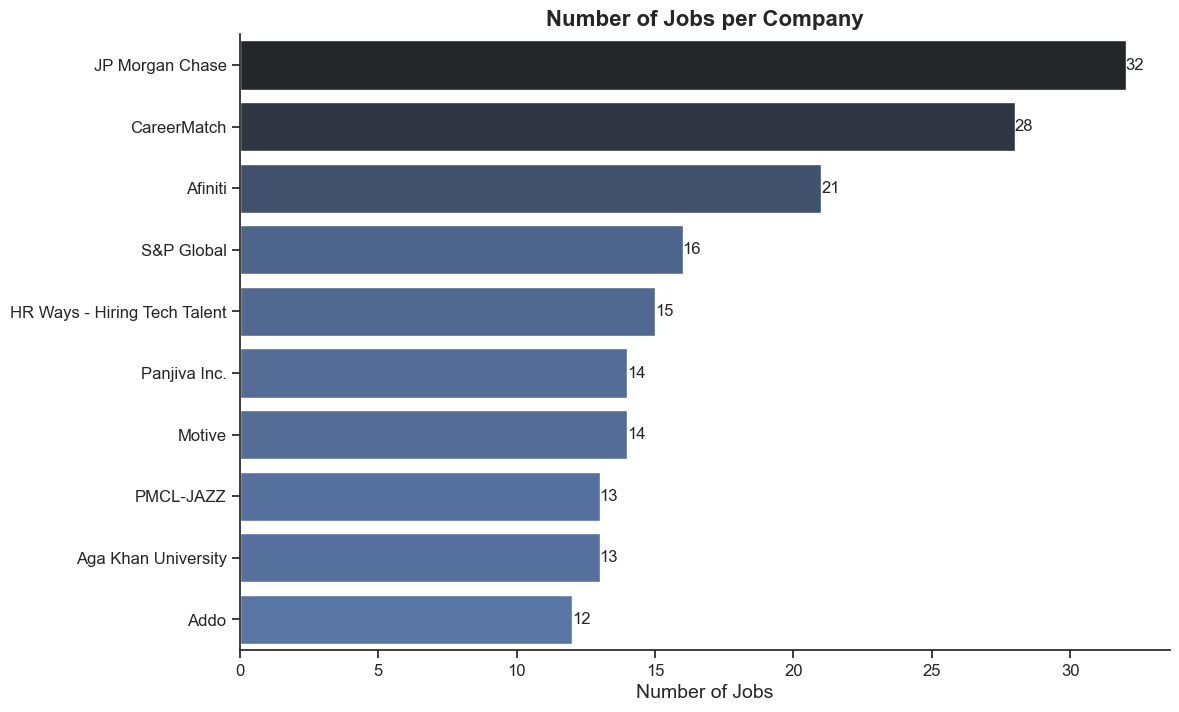

                              count
company_name                       
JP Morgan Chase                  32
CareerMatch                      28
Afiniti                          21
S&P Global                       16
HR Ways - Hiring Tech Talent     15
Panjiva Inc.                     14
Motive                           14
PMCL-JAZZ                        13
Aga Khan University              13
Addo                             12


In [78]:
# Create a DataFrame with value counts for company names and select top 20
df_plot = df['company_name'].value_counts().to_frame().head(10)
df_plot.columns = ['count']

# Set the theme for consistency
sns.set_theme(style='ticks')

# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(figsize=(12, 8))

# Create a horizontal bar plot with Seaborn, specifying the axes
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', ax=ax, legend=False)

# Customize the plot
ax.set_title('Number of Jobs per Company', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Jobs', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove spines for a cleaner look
sns.despine(ax=ax)

# Annotate each bar with the count value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# Show the plot
plt.show()

# Optionally, save the plot to a file
fig.savefig('jobs_per_company_oop.png', dpi=300, bbox_inches='tight')

# Display a summary of the data for added insight
print(df_plot)


In [79]:
df.job_schedule_type.unique()

array(['Full-time', 'Part-time and Contractor', 'Contractor',
       'Part-time and Internship', 'Part-time',
       'Full-time and Internship', 'Internship',
       'Full-time and Contractor', 'Full-time and Part-time', nan,
       'Contractor and Temp work', 'Contractor and Internship'],
      dtype=object)

In [80]:
# Aggregate counts by job_title_short and city
df_counts = df.groupby(['job_title_short', 'city']).size().reset_index(name='count')
pd.DataFrame(df_counts)

,job_title_short,city,count
0,Business Analyst,Anywhere,9
1,Business Analyst,Faisalabad,2
2,Business Analyst,Hyderabad,4
3,Business Analyst,Islamabad,5
4,Business Analyst,Karachi,2
...,...,...,...
74,Senior Data Scientist,Lahore,14
75,Senior Data Scientist,Multan,1
76,Senior Data Scientist,Peshawar,1
77,Senior Data Scientist,Rawalpindi,2


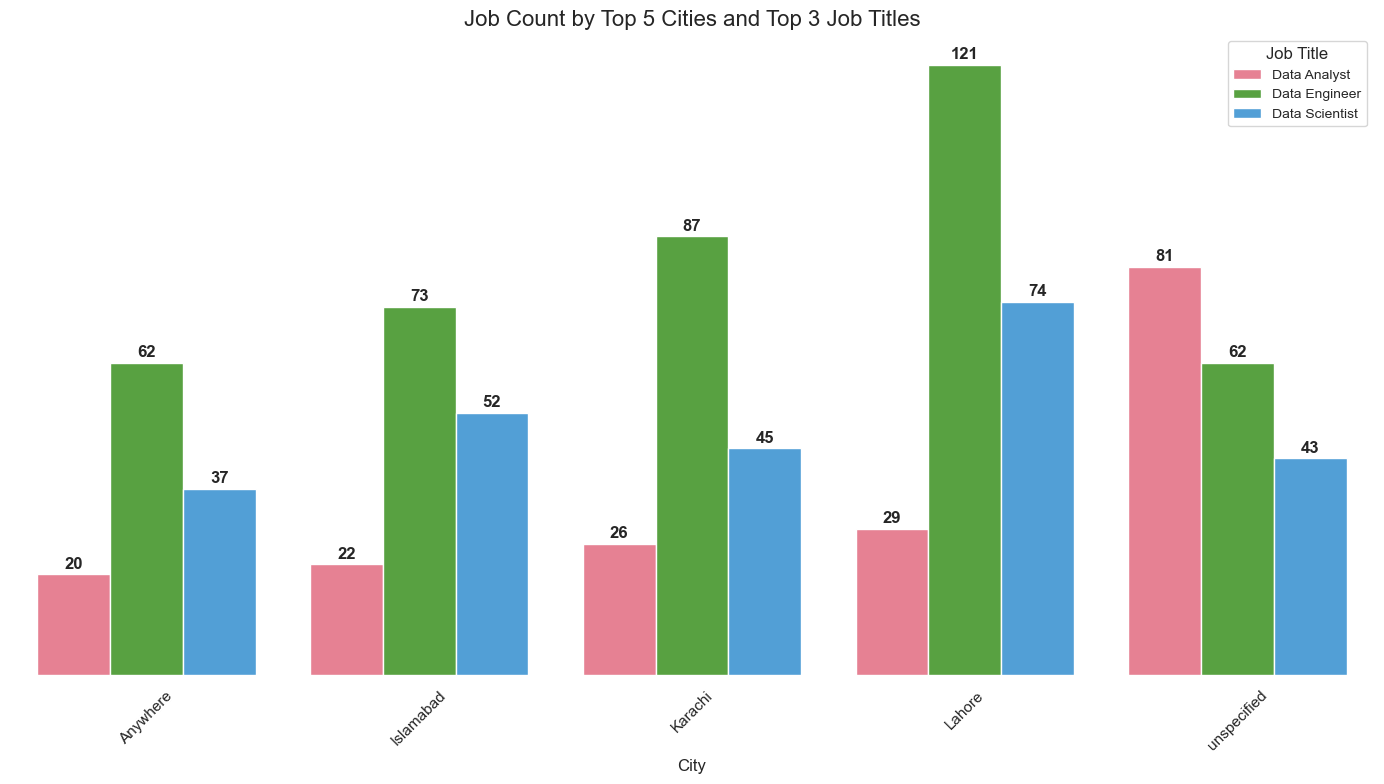

Top 5 cities: ['Lahore', 'unspecified', 'Islamabad', 'Karachi', 'Anywhere']
Top 3 job titles: ['Data Engineer', 'Data Scientist', 'Data Analyst']


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 cities by total job count
top_5_cities = df_counts.groupby('city')['count'].sum().nlargest(5).index.tolist()

# Get top 3 job titles by total count
top_3_jobs = df_counts.groupby('job_title_short')['count'].sum().nlargest(3).index.tolist()

# Filter the dataframe to include only top 5 cities and top 3 job titles
df_filtered = df_counts[df_counts['city'].isin(top_5_cities) & df_counts['job_title_short'].isin(top_3_jobs)]

# Set the style for all plots
sns.set_style("white")

# Set a color palette
color_palette = sns.color_palette("husl", n_colors=len(top_3_jobs))

# Grouped Bar Chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='city', y='count', hue='job_title_short', data=df_filtered, palette=color_palette)

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove y-axis
ax.yaxis.set_visible(False)

# Remove top and bottom ticks
ax.xaxis.set_ticks_position('none')

# Add count at the top of each bar with bigger and bold font
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, fontweight='bold', padding=2)

plt.title('Job Count by Top 5 Cities and Top 3 Job Titles', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Job Title', title_fontsize='12', fontsize='10')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print the selected top cities and job titles
print("Top 5 cities:", top_5_cities)
print("Top 3 job titles:", top_3_jobs)